In [ ]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Decision Tree

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


%matplotlib inline


In [ ]:
kk = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv")
kk.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


# a)

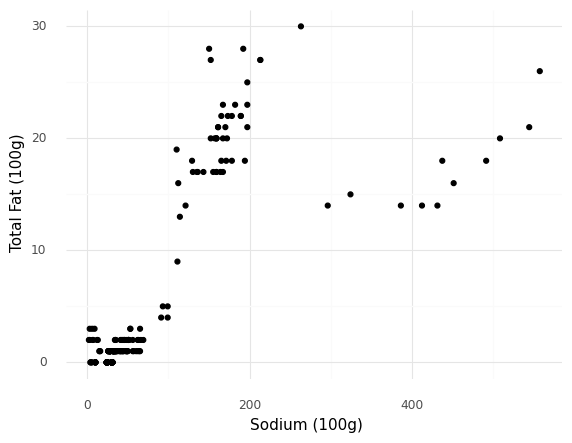

<ggplot: (8771562516025)>

In [ ]:
# a

# Sodium_100g vs Total_Fat_100g
(ggplot(kk, aes(x = "Sodium_100g", y = "Total_Fat_100g")) + geom_point() + labs(x = "Sodium (100g)", y = "Total Fat (100g)") + theme_minimal())


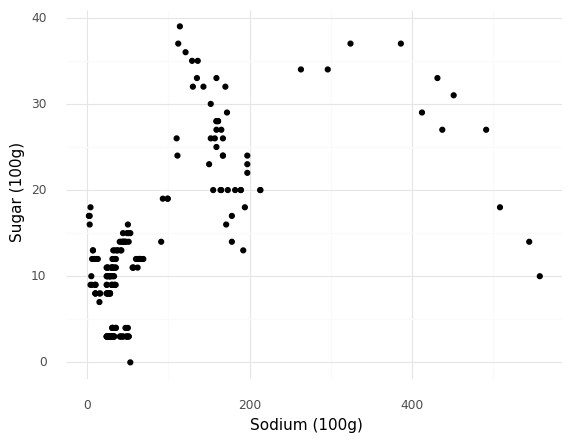

<ggplot: (8771562617353)>

In [ ]:
#Sodium_100g vs. Sugar_100g
(ggplot(kk, aes(x = "Sodium_100g", y = "Sugar_100g")) + geom_point() + labs(x = "Sodium (100g)", y = "Sugar (100g)") +theme_minimal())

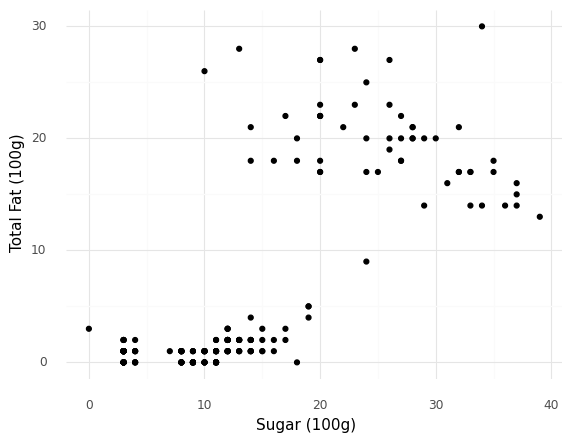

<ggplot: (8771568692701)>

In [ ]:
#Sugar_100g vs Total_Fat_100g
(ggplot(kk, aes(x = "Sugar_100g", y = "Total_Fat_100g")) + geom_point() + labs(x = "Sugar (100g)", y = "Total Fat (100g)") + theme_minimal())

# b)  

**DBSCAN** is the best algorithm for this data because all three scatterplots have noise which are data points that do not belong to cluster, and DBSCAN is good for scatterplots with noise. **Hierarchical Clustering** would not work because their distance measures are sensitive to noise. The scatterplots in this data have non-spherical or non-eliptical shapes which is why DBSCAN works since it goes from point to point to find all points which are density reachable. The **Gaussian Mixture Models (EM)** would not work because they allow and assume eliptical shape clusters. **K-Means** also does not work because they assume that the clusters are spherical. The data is not High Dimensional Data since each of the scatterplots has one outcome, and DBSCAN is less effective in finding clusters in High Dimensional Data so it works accurately on small data sets.    

# c)

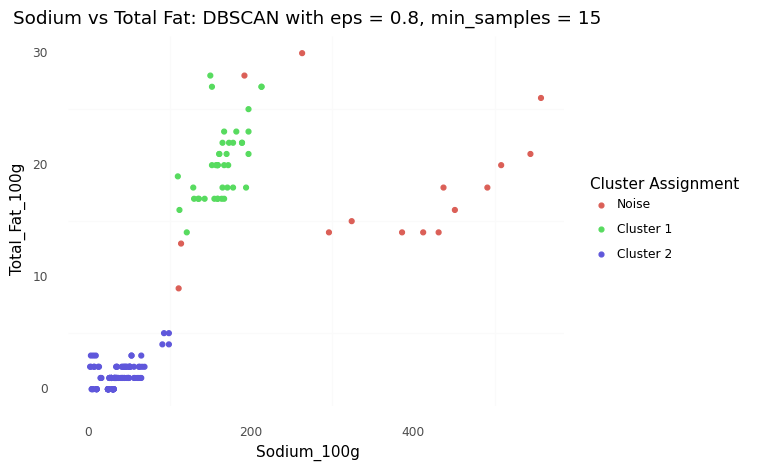

<ggplot: (8771569662905)>

In [ ]:
# best DBSCAN

z = StandardScaler()
k_kreme = kk[["Total_Fat_100g","Sodium_100g", "Sugar_100g"]]
z_kk = z.fit_transform(k_kreme)
db_kk = DBSCAN(eps = 0.8, min_samples = 15).fit(z_kk)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db_kk.labels_)))]

k_kreme["assignments"] = db_kk.labels_

(ggplot(k_kreme, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "Sodium vs Total Fat: DBSCAN with eps = 0.8, min_samples = 15"))

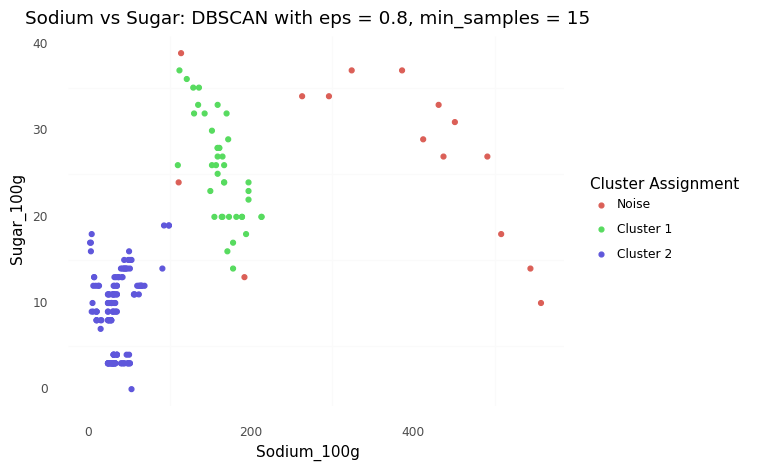

<ggplot: (8771562746809)>

In [ ]:
(ggplot(k_kreme, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "Sodium vs Sugar: DBSCAN with eps = 0.8, min_samples = 15"))

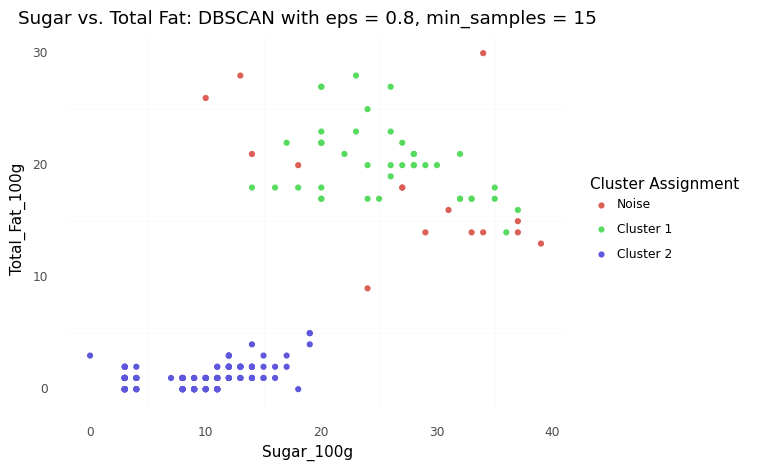

<ggplot: (8771562522857)>

In [ ]:
(ggplot(k_kreme, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "Sugar vs. Total Fat: DBSCAN with eps = 0.8, min_samples = 15"))

In [ ]:
# grab only clustered data points
k_kreme_clustered = k_kreme.loc[(k_kreme.assignments >= 0)]


# overall
print("DBSCAN Silhouette Score: ", silhouette_score(k_kreme_clustered[["Total_Fat_100g","Sodium_100g", "Sugar_100g"]], k_kreme_clustered["assignments"]))

DBSCAN Silhouette Score:  0.8190047194341354


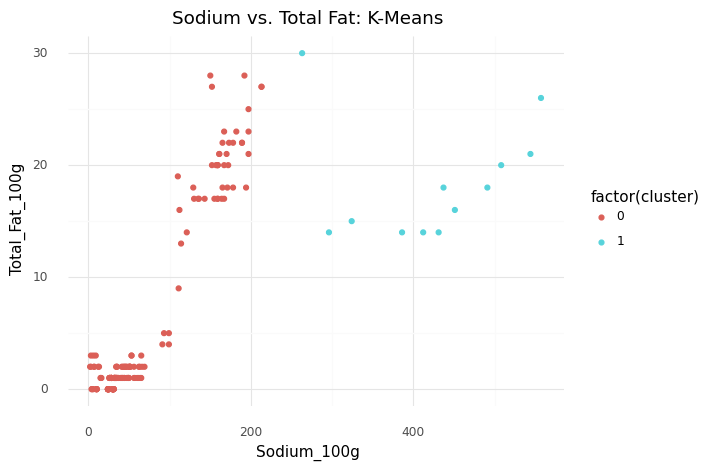

<ggplot: (8771565042577)>

In [ ]:
# worst K-Means
# km
km = KMeans(n_clusters = 2)
km.fit(k_kreme)

# labels
membership = km.predict(k_kreme)

k_kreme["cluster"] = membership

k_kreme
# plot

(ggplot(k_kreme, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(cluster)")) +
 geom_point() + theme_minimal() + labs(title = "Sodium vs. Total Fat: K-Means"))


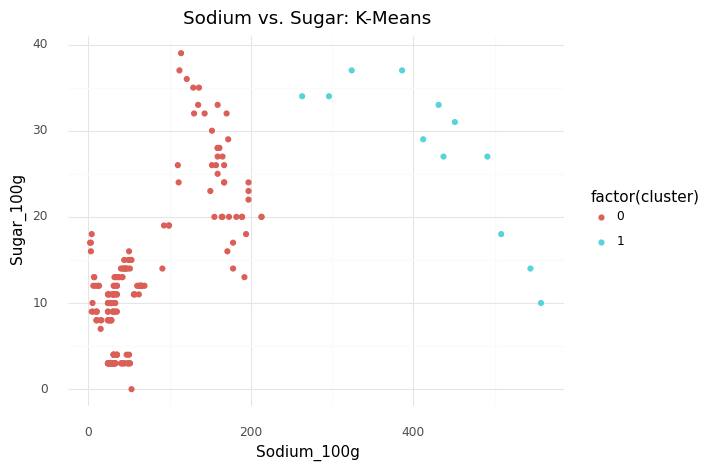

<ggplot: (8771568684737)>

In [ ]:
(ggplot(k_kreme, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(cluster)")) +
 geom_point() + theme_minimal() + labs(title = "Sodium vs. Sugar: K-Means"))


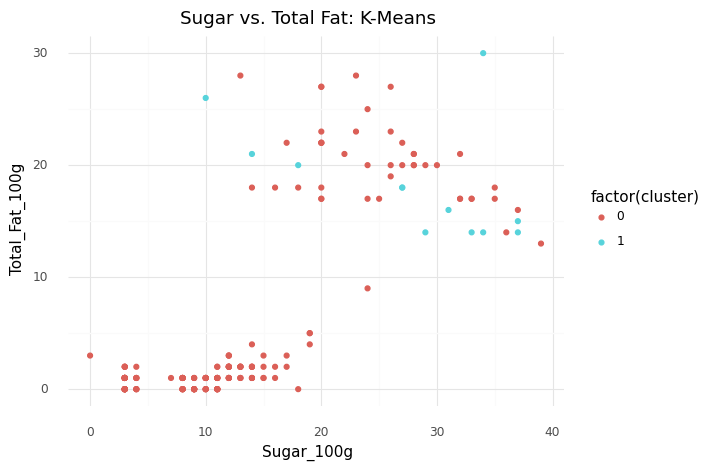

<ggplot: (8771562788621)>

In [ ]:
(ggplot(k_kreme, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = "factor(cluster)")) +
 geom_point() + theme_minimal() + labs(title = "Sugar vs. Total Fat: K-Means"))


In [ ]:
print("K-Means Silhouette Score: ", silhouette_score(k_kreme, membership))

K-Means Silhouette Score:  0.803593856661324


For min_samples, I choose 15 because the data is relatively small. So when I tested with a min sample larger than 15, there seems to be less clusters and we need more clusters since the dataset seems spread out. For eps, I choose 0.8 based on the number of neighbors for the min samples.   

# d)

For DBSCAN, the metric that I used to asses my model is using silhouette score. I got a silhouette score of about 0.82 which is close to 1. A good silhouette score has to be closer to 1. It means that my model has good cohesion and separation. In conclusion, my model is good since it has a high silhouette score.

For K-Means, the metric that I used to asses my model is also a silhouette score. I got a silhouette score of about 0.80 which is also close to 1. A good silhouette score has to be closer to 1. It means that my model has good cohesion and separation. In conclusion, my model is good since it has a high silhouette score.

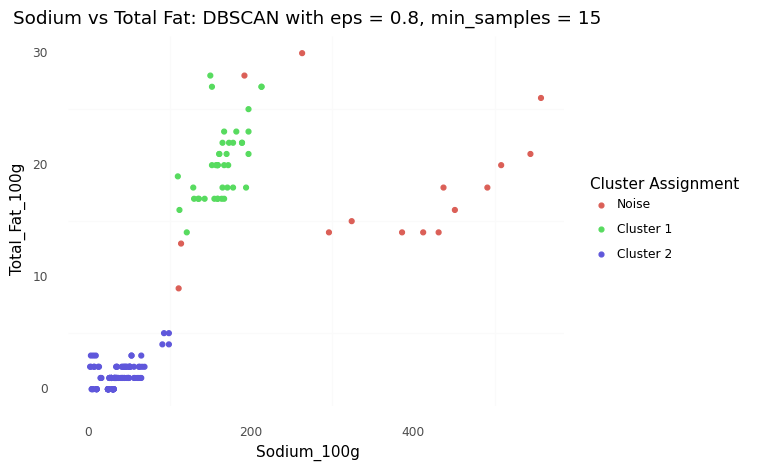

<ggplot: (8771568619021)>

In [ ]:
(ggplot(k_kreme, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "Sodium vs Total Fat: DBSCAN with eps = 0.8, min_samples = 15"))

For this model, most of the data points in the noise cluster is high sodium and high total fat. The first cluster (green cluster) represents low sodium and high total fat. The second cluster (blue cluster) represents low sodium and low total fat.

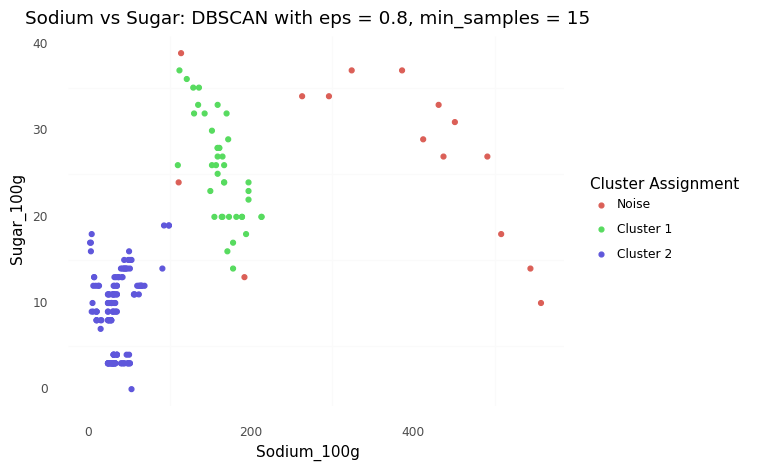

<ggplot: (8771562847973)>

In [ ]:
(ggplot(k_kreme, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "Sodium vs Sugar: DBSCAN with eps = 0.8, min_samples = 15"))

For this model, most of the data points in the noise cluster is high sodium and relatively high sugar. The first cluster (green cluster) represents relativelty low sodium and relatively high sugar. The second cluster (blue cluster) represents low sodium and relatively low sugar.

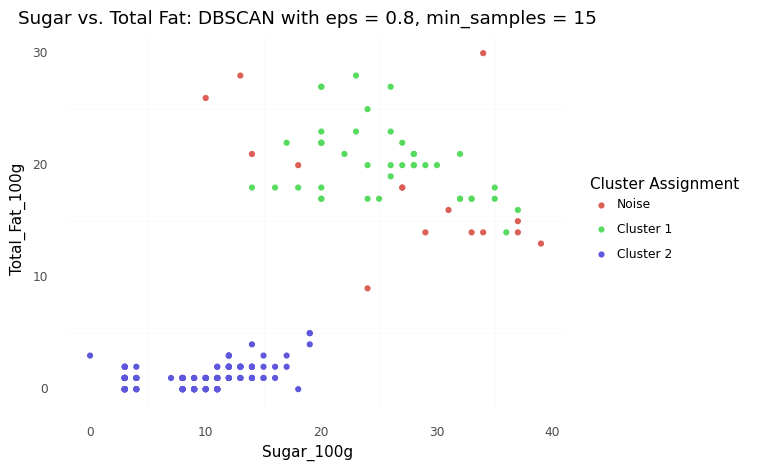

<ggplot: (8771562850033)>

In [ ]:
(ggplot(k_kreme, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "Sugar vs. Total Fat: DBSCAN with eps = 0.8, min_samples = 15"))

For this model, most of the data points in the noise cluster is high sugar and relatively high total fat. The first cluster (green cluster) represents relativelty high sugar and high total fat. The second cluster (blue cluster) represents relatively low sugar and low total fat.

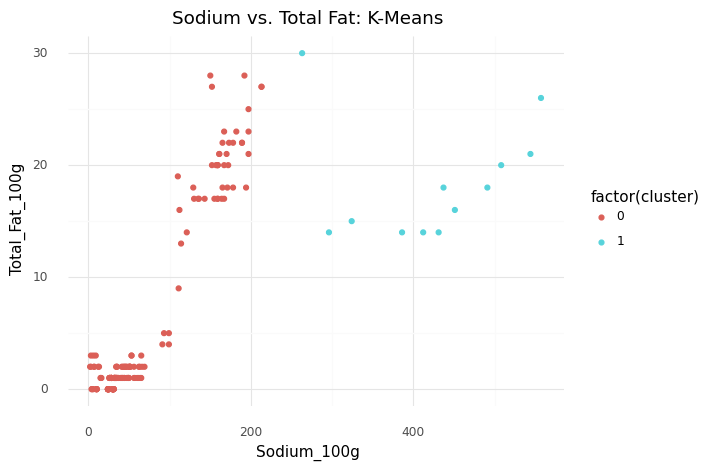

<ggplot: (8771562729565)>

In [ ]:
(ggplot(k_kreme, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(cluster)")) +
 geom_point() + theme_minimal() + labs(title = "Sodium vs. Total Fat: K-Means"))


The red cluster represents low sodium and both low and high total fat. The blue cluster represents relatively high sodium and high total fat.

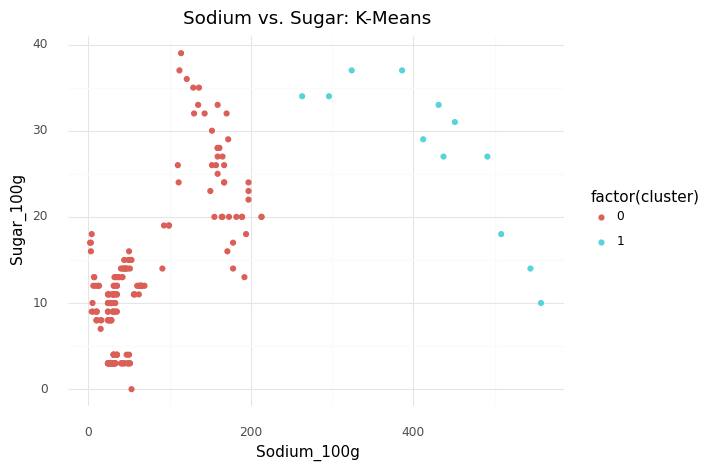

<ggplot: (8771562520129)>

In [ ]:
(ggplot(k_kreme, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(cluster)")) +
 geom_point() + theme_minimal() + labs(title = "Sodium vs. Sugar: K-Means"))


The red cluster represents relatively low sodium and both low and high total sugar. The blue cluster represents relatively high sodium and relatively high sugar.

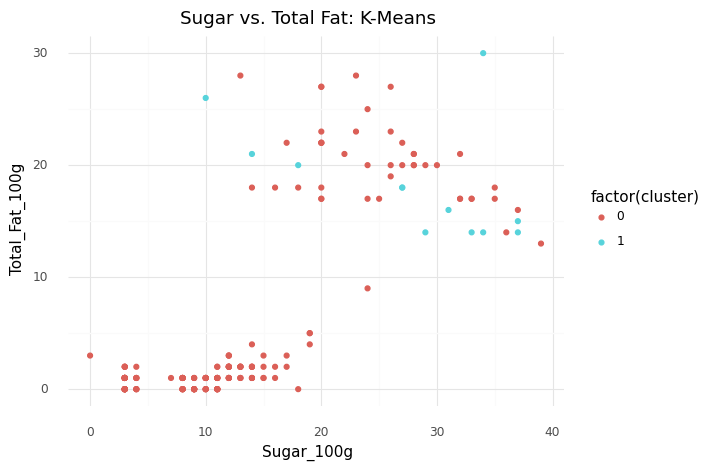

<ggplot: (8771562535161)>

In [ ]:
(ggplot(k_kreme, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = "factor(cluster)")) +
 geom_point() + theme_minimal() + labs(title = "Sugar vs. Total Fat: K-Means"))


The red cluster represents overall sugar and overall total fat. The blue cluster represents relatively high sugar and high total fat.

# e)

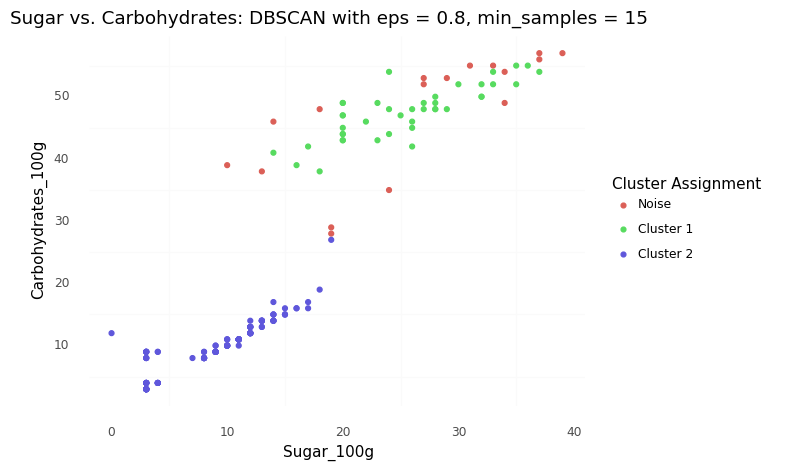

<ggplot: (8771562349953)>

In [ ]:
# e

kk_kreme = kk[["Total_Fat_100g","Sodium_100g", "Sugar_100g","Carbohydrates_100g"]]
z_kkk = z.fit_transform(kk_kreme)
db_kkk = DBSCAN(eps = 0.8, min_samples = 15).fit(z_kkk)

labsList = ["Noise"]
labsList = labsList  + ["Cluster " + str(i) for i in range(1,len(set(db_kkk.labels_)))]

kk_kreme["assignments"] = db_kkk.labels_
(ggplot(kk_kreme, aes(x = "Sugar_100g", y = "Carbohydrates_100g", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "Sugar vs. Carbohydrates: DBSCAN with eps = 0.8, min_samples = 15"))

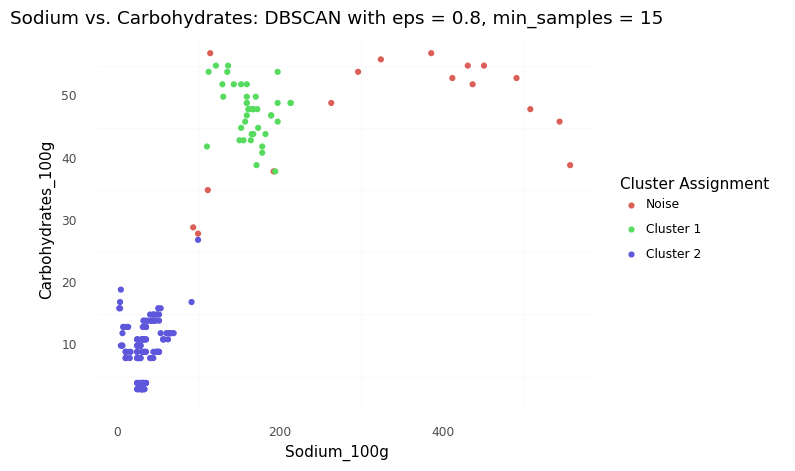

<ggplot: (8771562637625)>

In [ ]:
(ggplot(kk_kreme, aes(x = "Sodium_100g", y = "Carbohydrates_100g", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "Sodium vs. Carbohydrates: DBSCAN with eps = 0.8, min_samples = 15"))

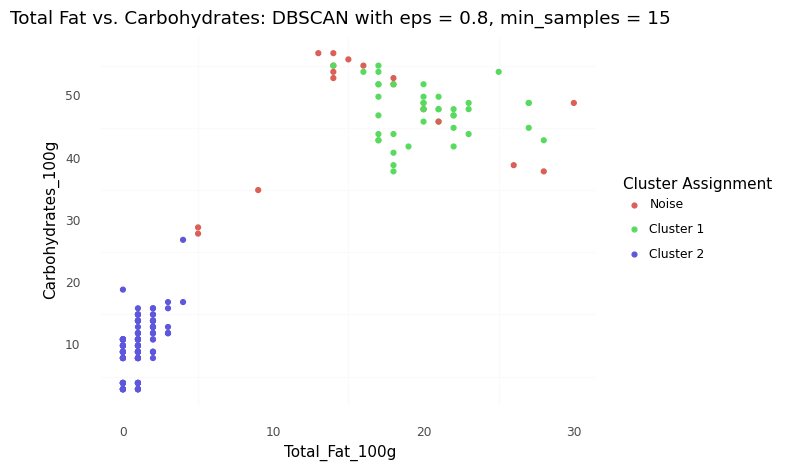

<ggplot: (8771568311285)>

In [ ]:
(ggplot(kk_kreme, aes(x = "Total_Fat_100g", y = "Carbohydrates_100g", color = "factor(assignments)")) +
 geom_point() +
 theme_minimal() +
 scale_color_discrete(name = "Cluster Assignment",
                      labels = labsList) +
theme(panel_grid_major = element_blank()) +
labs(title = "Total Fat vs. Carbohydrates: DBSCAN with eps = 0.8, min_samples = 15"))

In [ ]:
kk_kreme_clustered = kk_kreme.loc[(kk_kreme.assignments >= 0)]


# overall
print("DBSCAN Silhouette Score: ", silhouette_score(kk_kreme_clustered[["Total_Fat_100g","Sodium_100g", "Sugar_100g", "Carbohydrates_100g"]], kk_kreme_clustered["assignments"]))

DBSCAN Silhouette Score:  0.8317668760328647


I choose Carbohydrates_100g based on my knowledge about food. The reason is that all these type of deserts especially bread based contain carbohydrates. Carbohydrates has also played an impact for my health. In general I try to eat food that contain less carbohydrates.  

Yes, this variable improved my data. My silhouette score for this data is 0.83. On my previous data that I did a DBSCAN, my silhouette score is about 0.82. My score did not changed much, but it improved by 0.01.

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/Anthony_Walujono_Project2.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "Anthony_Walujono_Project2.ipynb"
#!jupyter nbconvert --to PDF "HW1_Anthony_Walujono.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa

In [ ]:
!jupyter nbconvert --to PDF "Anthony_Walujono_Project2.ipynb"

[NbConvertApp] Converting notebook Anthony_Walujono_Project2.ipynb to PDF
[NbConvertApp] Support files will be in Anthony_Walujono_Project2_files/
[NbConvertApp] Making directory ./Anthony_Walujono_Project2_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project2_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project2_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project2_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project2_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project2_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project2_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project2_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project2_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project2_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project2_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project2_files
[NbConvertApp] Making directory ./Anthony_Walujono_Project2_f